<a href="https://colab.research.google.com/github/MADHAVAHARSHA/Analysis_of_Alzheimer-s_MRI_Dataset/blob/main/Fifa22_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/Fifa22")

In [ ]:
!ls

 6397projects.pdf
 6397tableau.pdf
'Career Mode player datasets - FIFA 15-22.xlsx'
'Edward R. Tufte small.pdf'
'Fifa22 Visualisation.ipynb'
'Final Submission Fifa19.pdf'
 players_22.csv
 player_values.xlsx
 Presentation.gslides
'Project Wireframes - Avg Height.gsheet'
'Project Wireframes - Avg Weight.gsheet'
'Project Wireframes - Body type bar chart.gsheet'
 SP1.pdf
'Untitled spreadsheet.gsheet'


# Read Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/players_22.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df[["value_eur", "wage_eur", "height_cm", "weight_kg", "nationality_name", "body_type"]]

,value_eur,wage_eur,height_cm,weight_kg,nationality_name,body_type
0,78000000.0,320000.0,170,72,Argentina,Unique
1,119500000.0,270000.0,185,81,Poland,Unique
2,45000000.0,270000.0,187,83,Portugal,Unique
3,129000000.0,270000.0,175,68,Brazil,Unique
4,125500000.0,350000.0,181,70,Belgium,Unique
...,...,...,...,...,...,...
19234,70000.0,1000.0,180,64,China PR,Lean (170-185)
19235,110000.0,500.0,175,70,Republic of Ireland,Lean (170-185)
19236,100000.0,500.0,178,72,Republic of Ireland,Lean (170-185)
19237,110000.0,500.0,173,66,Republic of Ireland,Lean (170-185)


In [ ]:
print(list(df.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

## EDA

In [ ]:
df['club_joined']= pd.to_datetime(df['club_joined'])
df['dob']= pd.to_datetime(df['dob'])

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Dtype         
---   ------                       -----         
 0    sofifa_id                    int64         
 1    player_url                   object        
 2    short_name                   object        
 3    long_name                    object        
 4    player_positions             object        
 5    overall                      int64         
 6    potential                    int64         
 7    value_eur                    float64       
 8    wage_eur                     float64       
 9    age                          int64         
 10   dob                          datetime64[ns]
 11   height_cm                    int64         
 12   weight_kg                    int64         
 13   club_team_id                 float64       
 14   club_name                    object        
 15   league_name                  objec

In [ ]:
df['club_joined_age'] = df['club_joined']-df['dob']
df['club_joined_age'] = df['club_joined_age'] / np.timedelta64(1, "Y")

In [ ]:
df['nationality_name'].value_counts()[:30]

England                1719
Germany                1214
Spain                  1086
France                  980
Argentina               960
Brazil                  897
Japan                   546
Netherlands             439
United States           413
Poland                  403
China PR                385
Sweden                  385
Norway                  379
Republic of Ireland     374
Portugal                373
Saudi Arabia            355
Mexico                  352
Romania                 338
Italy                   338
Korea Republic          325
Colombia                322
Belgium                 321
Austria                 319
Denmark                 307
Scotland                293
Turkey                  291
Uruguay                 280
Australia               266
India                   223
Venezuela               212
Name: nationality_name, dtype: int64

# Visualize

## Club Joining Age

In [ ]:
joining_age_dict = {}
top_n_nations = 30
Y_axis_column = "club_joined_age"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  joining_age_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


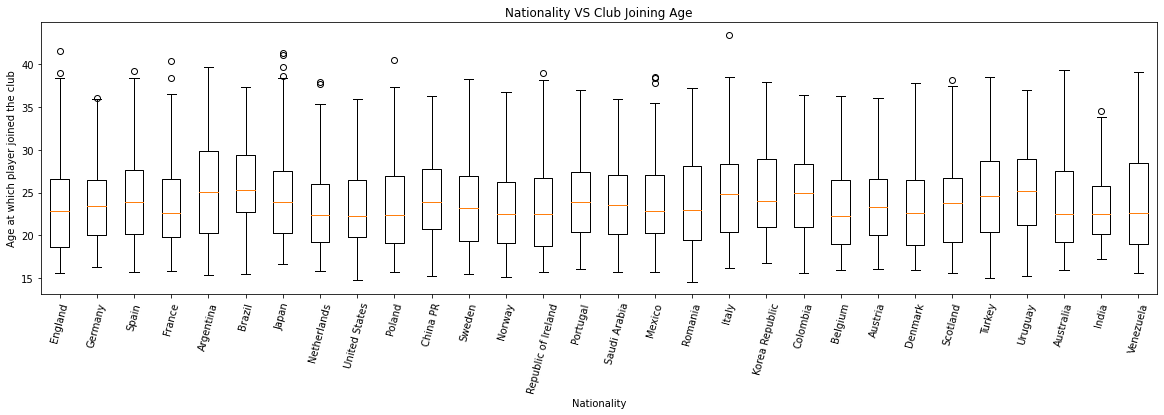

In [ ]:
import matplotlib.pyplot as plt

data = list(joining_age_dict.values())

plt.figure(figsize=(20, 5))

plt.boxplot(data)

plt.title("Nationality VS Club Joining Age")
plt.xlabel("Nationality")
plt.ylabel("Age at which player joined the club")
plt.xticks(range(1,top_n_nations+1), joining_age_dict.keys(), rotation=75)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


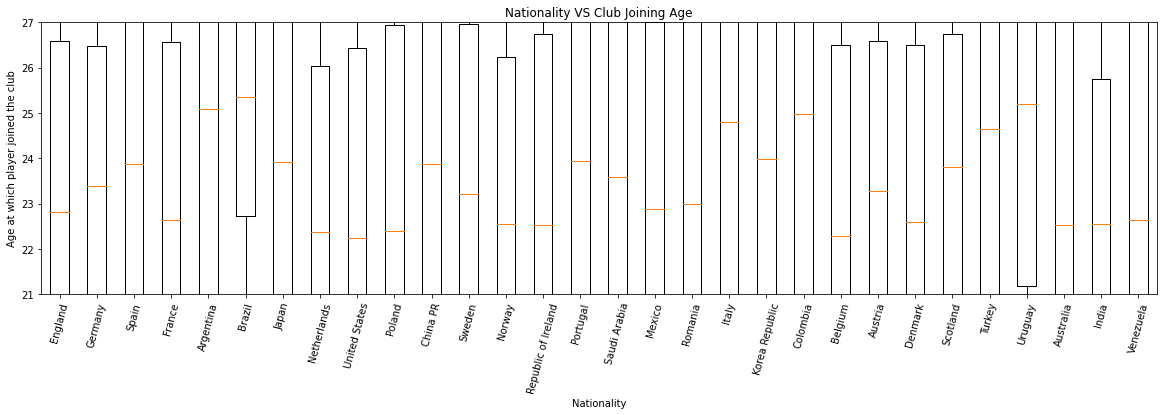

In [ ]:
import matplotlib.pyplot as plt

data = list(joining_age_dict.values())

plt.figure(figsize=(20, 5))

plt.boxplot(data)

plt.title("Nationality VS Club Joining Age")
plt.xlabel("Nationality")
plt.ylabel("Age at which player joined the club")
plt.xticks(range(1,top_n_nations+1), joining_age_dict.keys(), rotation=75)

plt.ylim([21, 27])

plt.show()

## Value in EUR

In [ ]:
value_dict = {}
top_n_nations = 30
Y_axis_column = "value_eur"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  value_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


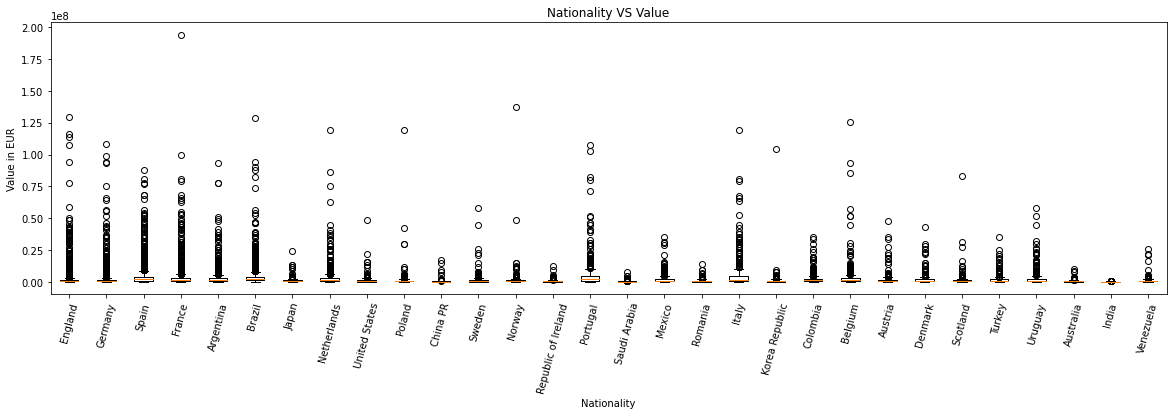

In [ ]:
import matplotlib.pyplot as plt

data = list(value_dict.values())

plt.figure(figsize=(20, 5))

plt.boxplot(data)

plt.title("Nationality VS Value")
plt.xlabel("Nationality")
plt.ylabel("Value in EUR")
plt.xticks(range(1,top_n_nations+1), value_dict.keys(), rotation=75)

plt.show()

In [ ]:
x = [1,2,3]
while x:
  print(x.pop())

3
2
1


In [ ]:
import pandas as pd
from numpy.random import randint


value_df = pd.DataFrame({'Country':[],
                   'Player Value':[]
                   }
                  )

for i in range(top_n_nations):
  nation = nations[i]
  player_values = list(value_dict[nation])
  while player_values:
    value_df.loc[len(value_df.index)] = [nation, player_values.pop()]

value_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15070 entries, 0 to 15069
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       15070 non-null  object 
 1   Player Value  15070 non-null  float64
dtypes: float64(1), object(1)
memory usage: 353.2+ KB


In [ ]:
value_df

,Country,Player Value
0,England,110000.0
1,England,110000.0
2,England,120000.0
3,England,100000.0
4,England,100000.0
...,...,...
15065,Venezuela,16500000.0
15066,Venezuela,9000000.0
15067,Venezuela,22000000.0
15068,Venezuela,21500000.0


In [ ]:
value_df.to_excel("player_values.xlsx", index=False)

## Wage in EUR

In [ ]:
wage_dict = {}
top_n_nations = 30
Y_axis_column = "wage_eur"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  wage_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


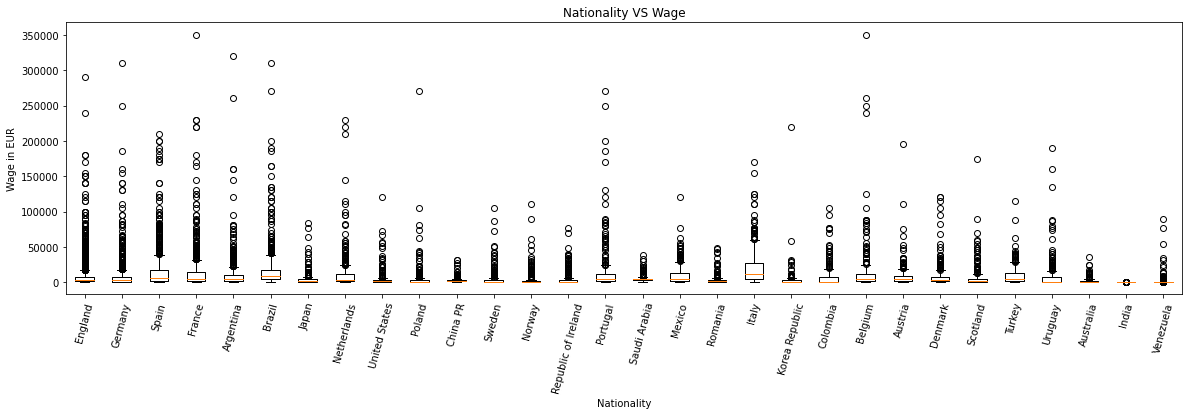

In [ ]:
import matplotlib.pyplot as plt

data = list(wage_dict.values())

plt.figure(figsize=(20, 5))

plt.boxplot(data)

plt.title("Nationality VS Wage")
plt.xlabel("Nationality")
plt.ylabel("Wage in EUR")
plt.xticks(range(1,top_n_nations+1), wage_dict.keys(), rotation=75)

plt.show()

### Avg Wage

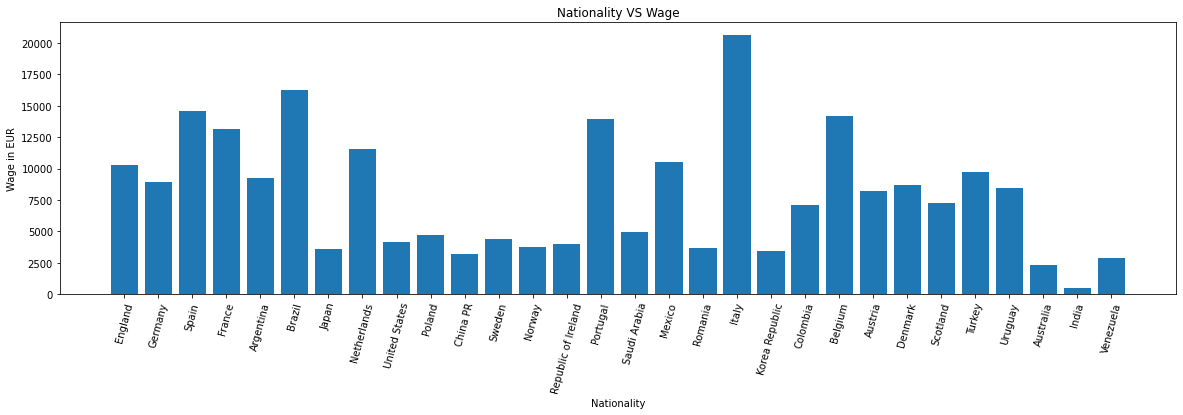

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

Nationality = list(wage_dict.keys())
Avg_Wage = [x.mean() for x in wage_dict.values()]

plt.bar(Nationality, Avg_Wage)

plt.title("Nationality VS Wage")
plt.xlabel("Nationality")
plt.ylabel("Wage in EUR")
plt.xticks(range(top_n_nations), wage_dict.keys(), rotation=75)

plt.show()

In [ ]:
Avg_Wage

[10270.41884816754,
 8908.896210873147,
 14599.217311233886,
 13164.387755102041,
 9265.885416666666,
 16266.220735785953,
 3626.3736263736264,
 11534.851936218678,
 4165.496368038741,
 4709.600997506234,
 3202.8571428571427,
 4435.416666666667,
 3779.419525065963,
 3975.3351206434318,
 13966.621983914209,
 4919.295774647887,
 10539.0625,
 3680.0,
 20603.698224852073,
 3442.3076923076924,
 7077.9503105590065,
 14214.21875,
 8200.471698113208,
 8694.13680781759,
 7268.430034129693,
 9760.137457044673,
 8474.285714285714,
 2335.687022900763,
 513.0044843049327,
 2861.0849056603774]

## Body Type

In [ ]:
wage_dict = {}
top_n_nations = 30
Y_axis_column = "body_type"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  wage_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


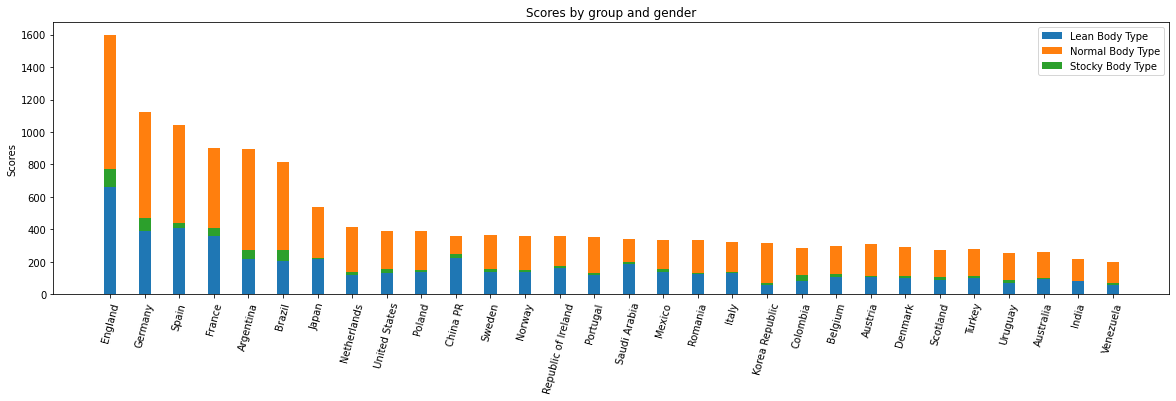

In [ ]:
import matplotlib.pyplot as plt


labels = list(wage_dict.keys())
normal_type, lean_type, stocky_type = [],[],[]

for body_types in wage_dict.values():
  lean_type.append(len(list(filter(lambda body_type: "L" in body_type, body_types))))
  normal_type.append(len(list(filter(lambda body_type: "N" in body_type, body_types))))
  stocky_type.append(len(list(filter(lambda body_type: "S" in body_type, body_types))))

width = 0.35


plt.figure(figsize=(20, 5))

plt.bar(labels, lean_type, width, label='Lean Body Type')
plt.bar(labels, normal_type, width, bottom=lean_type ,label='Normal Body Type')
plt.bar(labels, stocky_type, width, bottom=lean_type ,label='Stocky Body Type')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.legend()

plt.xticks(range(top_n_nations), wage_dict.keys(), rotation=75)

plt.show()

## Value in EUR

In [ ]:
value_dict = {}
top_n_nations = 30
Y_axis_column = "value_eur"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  value_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


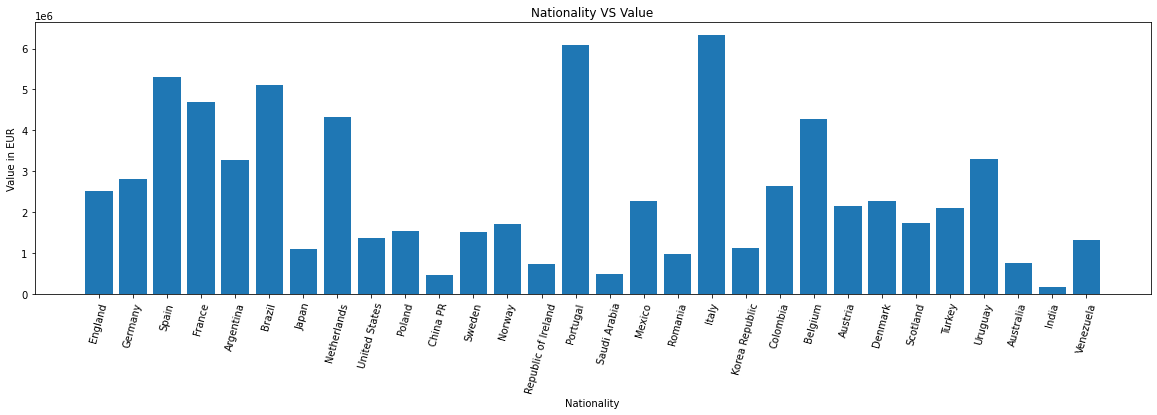

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

Nationality = list(value_dict.keys())
Avg_Wage = [x.mean() for x in value_dict.values()]

plt.bar(Nationality, Avg_Wage)

plt.title("Nationality VS Value")
plt.xlabel("Nationality")
plt.ylabel("Value in EUR")
plt.xticks(range(top_n_nations), value_dict.keys(), rotation=75)

plt.show()

## Avg Height

In [ ]:
height_dict = {}
top_n_nations = 30
Y_axis_column = "height_cm"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  height_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


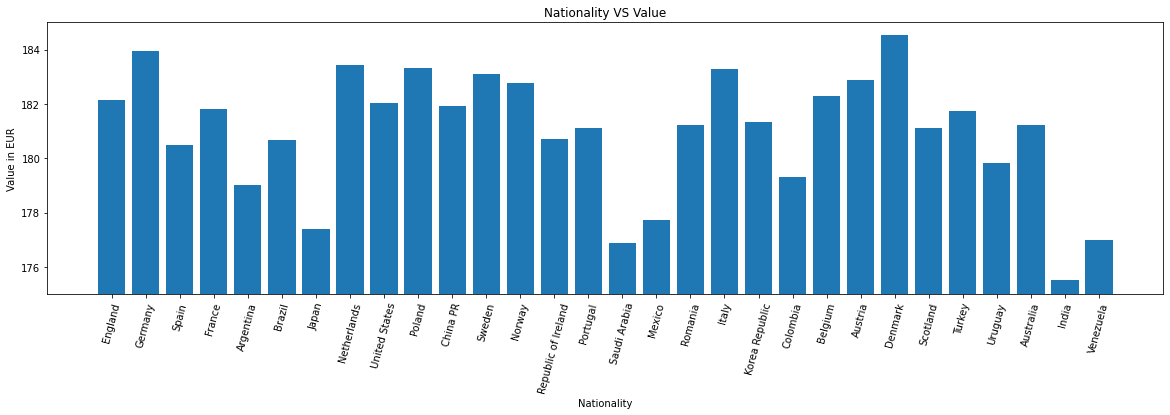

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

Nationality = list(height_dict.keys())
Avg_Wage = [x.mean() for x in height_dict.values()]

plt.bar(Nationality, Avg_Wage)

plt.title("Nationality VS Value")
plt.xlabel("Nationality")
plt.ylabel("Value in EUR")
plt.xticks(range(top_n_nations), height_dict.keys(), rotation=75)

plt.ylim([175,185])

plt.show()

## Avg Weight

In [ ]:
print(df.columns.to_list())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

In [ ]:
weight_dict = {}
top_n_nations = 30
Y_axis_column = "weight_kg"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  weight_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


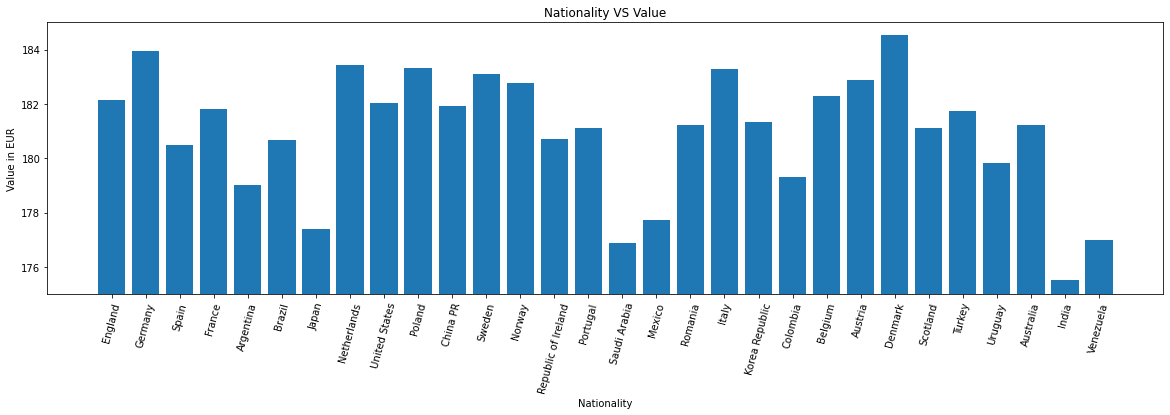

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

Nationality = list(weight_dict.keys())
Avg_Weight = [x.mean() for x in weight_dict.values()]

plt.bar(Nationality, Avg_Wage)

plt.title("Nationality VS Value")
plt.xlabel("Nationality")
plt.ylabel("Value in EUR")
plt.xticks(range(top_n_nations), weight_dict.keys(), rotation=75)

plt.ylim([175,185])

plt.show()

In [ ]:
Avg_Weight

[74.2239674229203,
 78.25782537067545,
 73.85911602209944,
 75.06020408163265,
 74.640625,
 75.74470457079153,
 71.57875457875458,
 75.90660592255125,
 76.7820823244552,
 75.75930521091811,
 74.16103896103895,
 76.55844155844156,
 75.6754617414248,
 73.34224598930481,
 74.26541554959786,
 69.85070422535212,
 72.6875,
 74.83136094674556,
 76.17455621301775,
 74.95692307692308,
 74.29503105590062,
 75.10280373831776,
 76.0564263322884,
 76.9543973941368,
 73.4914675767918,
 75.37800687285224,
 74.725,
 75.09774436090225,
 69.21076233183857,
 72.35377358490567]

## Avg Pace

In [ ]:
pace_dict = {}
top_n_nations = 30
Y_axis_column = "pace"

nations = df['nationality_name'].value_counts()[:top_n_nations].keys()

for nation in nations:
  pace_dict[nation] = np.array(df[df['nationality_name'] == nation][Y_axis_column].dropna())


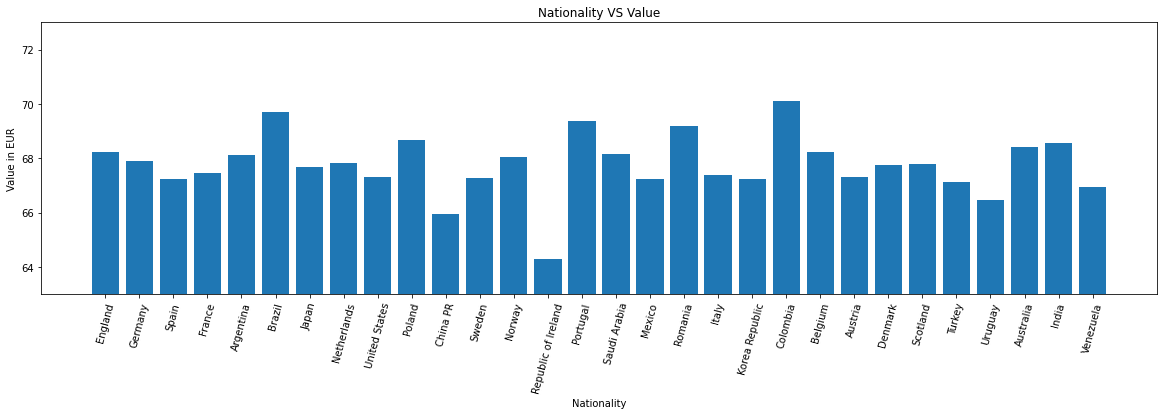

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

Nationality = list(weight_dict.keys())
Avg_Pace = [x.mean() for x in pace_dict.values()]

plt.bar(Nationality, Avg_Pace)

plt.title("Nationality VS Value")
plt.xlabel("Nationality")
plt.ylabel("Value in EUR")
plt.xticks(range(top_n_nations), weight_dict.keys(), rotation=75)

plt.ylim([63,73])

plt.show()